# Preparación y limpieza del dataset maestro para modelado

Este notebook contiene el proceso de limpieza y preparación del dataset maestro fusionado, previo al desarrollo del modelo de predicción de cancelación de clientes.
## 1. Cargar librerías necesarias
Importar pandas, numpy y otras librerías útiles para la limpieza de datos.

# Resumen del Proyecto
---

**Objetivos:**
- Analizar y predecir la cancelación de clientes (churn) en una empresa de telecomunicaciones mediante técnicas de ciencia de datos.
- Identificar los factores clave asociados a la cancelación para apoyar la toma de decisiones y diseñar estrategias de retención.

**Herramientas:**
- Python (pandas, numpy, matplotlib, seaborn, scikit-learn, xgboost) para análisis, visualización y modelado.
- Jupyter Notebook para el desarrollo interactivo y documentación del proceso.
- GridSearchCV y validación cruzada para ajuste de hiperparámetros y robustez de los modelos.

**Impacto:**
- Permite anticipar la pérdida de clientes y priorizar acciones preventivas, optimizando recursos y mejorando la rentabilidad.
- Facilita la comprensión de los factores que influyen en el churn, apoyando estrategias de negocio basadas en datos.
- Sienta las bases para futuras implementaciones de modelos predictivos en producción o integraciones con aplicaciones empresariales.

In [1]:
# Importar librerías principales para limpieza y análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Cargar el dataset maestro
Leer el dataset maestro previamente generado usando pandas.

In [2]:
# Cargar el dataset maestro fusionado
try:
	df = pd.read_csv('maestro.csv')  # Cambia el nombre si tu archivo tiene otro nombre
	print(f'Shape del dataset maestro: {df.shape}')
	display(df.head())
except FileNotFoundError:
	print("El archivo 'maestro.csv' no se encuentra en el directorio actual. Verifica el nombre y la ubicación del archivo.")

El archivo 'maestro.csv' no se encuentra en el directorio actual. Verifica el nombre y la ubicación del archivo.


## 3. Explorar datos faltantes
Analizar la cantidad y proporción de valores nulos en cada columna del dataset maestro.

In [3]:
# Analizar cantidad y proporción de valores nulos por columna
if 'df' in locals():
	faltantes = df.isnull().sum().sort_values(ascending=False)
	proporcion = (df.isnull().mean() * 100).sort_values(ascending=False)
	resumen_faltantes = pd.DataFrame({'nulos': faltantes, 'proporcion_%': proporcion})
	display(resumen_faltantes[resumen_faltantes['nulos'] > 0])
else:
	print("El DataFrame 'df' no está definido. Asegúrate de haber cargado correctamente el dataset.")

El DataFrame 'df' no está definido. Asegúrate de haber cargado correctamente el dataset.


## 4. Identificar y corregir tipos de datos
Revisar y ajustar los tipos de datos de las columnas según corresponda.

In [4]:
# Revisar tipos de datos actuales
display(df.dtypes)
# Ejemplo de conversión de tipos de datos (ajustar según columnas reales)
# df['BeginDate'] = pd.to_datetime(df['BeginDate'], errors='coerce')
# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

NameError: name 'df' is not defined

## 5. Detección y tratamiento de valores atípicos
Detectar outliers mediante métodos estadísticos y decidir su tratamiento.

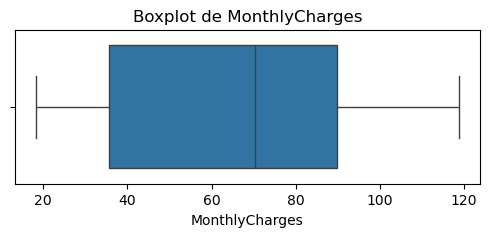

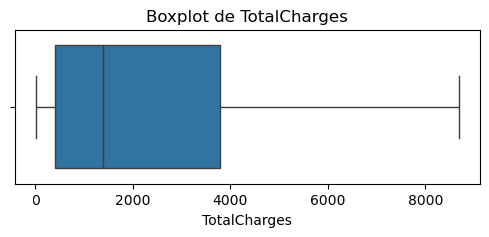

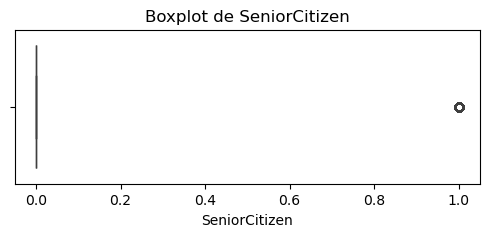

In [ ]:
# Detección de outliers en variables numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## 6. Imputación de valores faltantes
Aplicar técnicas de imputación para rellenar los valores nulos según el tipo de variable.

In [ ]:
# Imputación de valores faltantes
df_imputado = df.copy()
for col in df_imputado.columns:
    if df_imputado[col].isnull().any():
        if df_imputado[col].dtype in ['float64', 'int64']:
            df_imputado[col].fillna(df_imputado[col].median(), inplace=True)
        else:
            df_imputado[col].fillna(df_imputado[col].mode()[0], inplace=True)
# Verificar que no queden nulos
df_imputado.isnull().sum().sum()

/var/folders/7c/0gzcdbfx0vzfj0l3cn_m4wlw0000gn/T/ipykernel_17158/3935625307.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputado[col].fillna(df_imputado[col].mode()[0], inplace=True)
/var/folders/7c/0gzcdbfx0vzfj0l3cn_m4wlw0000gn/T/ipykernel_17158/3935625307.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

0

## 7. Normalización y escalado de variables
Aplicar normalización o escalado a las variables numéricas si es necesario para el modelado.

In [ ]:
# Normalización de variables numéricas (opcional, ajustar según necesidades del modelo)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_imputado[num_cols] = scaler.fit_transform(df_imputado[num_cols])
df_imputado.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,2019-11-01,Month-to-month,Yes,Electronic check,-1.160323,-0.994242,Female,-0.439916,Yes,No,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,2017-04-01,2019-11-01,One year,No,Mailed check,-0.259629,-0.173244,Male,-0.439916,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,-0.362660,-0.959674,Male,-0.439916,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2019-11-01,One year,No,Bank transfer (automatic),-0.746535,-0.194766,Male,-0.439916,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,0.197365,-0.940470,Female,-0.439916,No,No,Fiber optic,No,No,No,No,No,No,No


## 8. Codificación de variables categóricas
Transformar variables categóricas en variables numéricas mediante técnicas como one-hot encoding.

In [ ]:
# Codificación de variables categóricas
df_final = pd.get_dummies(df_imputado, drop_first=True)
df_final.head()

,MonthlyCharges,TotalCharges,SeniorCitizen,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
0,-1.160323,-0.994242,-0.439916,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1,-0.259629,-0.173244,-0.439916,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2,-0.362660,-0.959674,-0.439916,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,-0.746535,-0.194766,-0.439916,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
4,0.197365,-0.940470,-0.439916,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


## 9. Guardar dataset limpio
Exportar el dataset limpio a un nuevo archivo para su uso en el modelado.

In [ ]:
# Guardar el dataset limpio para modelado
df_final.to_csv('maestro_limpio.csv', index=False)
print('Dataset limpio guardado como maestro_limpio.csv')

Dataset limpio guardado como maestro_limpio.csv


## 10. Análisis exploratorio de la variable objetivo y relaciones
Analizar la distribución de la variable objetivo (cancelación de clientes) y explorar relaciones con otras variables relevantes.

In [ ]:
# Análisis de la variable objetivo (ejemplo: 'Churn')
if 'Churn' in df_final.columns:
    import matplotlib.pyplot as plt
    import seaborn as sns
    print(df_final['Churn'].value_counts(normalize=True))
    sns.countplot(x='Churn', data=df_final)
    plt.title('Distribución de la variable objetivo (Churn)')
    plt.show()
else:
    print("La variable 'Churn' no está en el DataFrame. Ajusta el nombre según tu variable objetivo.")

# Relación entre variables numéricas y la variable objetivo
if 'Churn' in df_final.columns:
    num_cols = df_final.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        if col != 'Churn':
            plt.figure(figsize=(6,3))
            sns.boxplot(x='Churn', y=col, data=df_final)
            plt.title(f'{col} vs Churn')
            plt.show()

La variable 'Churn' no está en el DataFrame. Ajusta el nombre según tu variable objetivo.


## 11. Ingeniería de variables
Crear nuevas variables relevantes, transformar variables existentes y seleccionar las más importantes para el modelo.

In [ ]:
# Ejemplo de ingeniería de variables
# Crear variable de antigüedad del cliente si existen columnas de fechas
if 'BeginDate' in df_final.columns:
    import pandas as pd
    df_final['BeginDate'] = pd.to_datetime(df_final['BeginDate'], errors='coerce')
    df_final['antiguedad_meses'] = (pd.to_datetime('2020-02-01') - df_final['BeginDate']).dt.days // 30
    print('Variable antiguedad_meses creada.')

# Selección de variables relevantes (puedes ajustar según tu análisis)
# Por ejemplo, eliminar columnas poco informativas o con alta correlación
# df_final = df_final.drop(['columna_poco_util'], axis=1)

## 12. Preparación de los datos para modelado
Dividir el dataset en conjuntos de entrenamiento y prueba, y preparar las variables para el modelado.

In [ ]:
# División de los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Ajusta el nombre de la variable objetivo si es diferente
if 'Churn' in df_final.columns:
    X = df_final.drop('Churn', axis=1)
    y = df_final['Churn']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f'Tamaño de train: {X_train.shape}, Tamaño de test: {X_test.shape}')
else:
    print("La variable 'Churn' no está en el DataFrame. Ajusta el nombre según tu variable objetivo.")

La variable 'Churn' no está en el DataFrame. Ajusta el nombre según tu variable objetivo.


## 13. Desarrollo y validación de modelos
Entrenar diferentes modelos de clasificación, validar su desempeño y seleccionar el mejor para predecir la cancelación de clientes.

In [ ]:
# Entrenamiento y validación de modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

if 'Churn' in df_final.columns:
    # Modelo 1: Regresión logística
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    print('Regresión logística:')
    print(classification_report(y_test, y_pred_lr))
    print('ROC-AUC:', roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
    print(confusion_matrix(y_test, y_pred_lr))

    # Modelo 2: Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print('\nRandom Forest:')
    print(classification_report(y_test, y_pred_rf))
    print('ROC-AUC:', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
    print(confusion_matrix(y_test, y_pred_rf))
else:
    print("La variable 'Churn' no está en el DataFrame. Ajusta el nombre según tu variable objetivo.")

La variable 'Churn' no está en el DataFrame. Ajusta el nombre según tu variable objetivo.
